<h2><font color="#004D7F" size=5>Módulo 3: Boosting</font></h2>


<h1><font color="#004D7F" size=6> 1. AdaBoost</font></h1>
<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Aprendizaje Automático II</font><br>
<font color="#004D7F" size=3>Universidad Nacional de Educación a Distancia</font>

</div>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
More information about [Manuel Castillo-Cara](https://www.manuelcastillo.eu/)

<div class="alert alert-block alert-info">

<i class="fa fa-info-circle" aria-hidden="true"></i>
Puedes ver más cursos de Inteligencia Artificial, Machine Learning y Deep Learning en mi [página web personal](https://www.manuelcastillo.eu/udemy/)

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>


* [1. Algoritmo de conjunto AdaBoost](#section1)
* [2. AdaBoost según el tipo de problema](#section2)
    * [2.1. AdaBoost para Clasificación](#section21)
    * [2.2. AdaBoost para Regresión](#section22)
* [3. Hiperparámetros de AdaBoost](#section3)
   * [3.1. Número de árboles](#section31)
   * [3.2. Profundida del árbol](#section32)
   * [3.3. Tasa de aprendizaje](#section33)
   * [3.4. Algoritmo alternativo](#section34)
* [4. Búsqueda de hiperparámetros por GridSearch](#section4)
* [Ejercicios](#sectionEj)

---

<a id="section0"></a>
# <font color="#004D7F">0. Contexto</font>

Boosting implica combinar las predicciones de muchos clasificadores débiles (modelo muy simple, aunque tiene cierta habilidad en el conjunto de datos). AdaBoost (Adaptative Boosting) fue el primer enfoque exitoso para la idea:
- Implica el uso de árboles de decisión muy cortos (de un nivel) como clasificadores débiles que se agregan secuencialmente al conjunto.
- Cada modelo posterior intenta corregir los errores de predicción cometidos por el modelo anterior en la secuencia. 

En este tutorial, estudiaremos:
- AdaBoost es un modelo creado a partir de árboles de decisión agregados secuencialmente al modelo.
- Cómo utilizar AdaBoost para clasificación y regresión con scikit-learn.
- Cómo explorar los hiperparámetros de AdaBoost en el rendimiento del modelo.


---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Algoritmo de conjunto AdaBoost</font>

### Boosting
Boosting se refiere:
- A algoritmos en los que los modelos se agregan secuencialmente y
- Los modelos posteriores en la secuencia corrigen las predicciones hechas por los modelos anteriores.
-_Adaptive Boosting_ (AdaBoost)fue uno de los primeros enfoques exitosos.

<figure><center>
  <img src="data/boosting.png" width="450" height="300" alt="Gráfica">
  <figcaption><blockquote>Modelos secuenciales vs. Bagging vs. Boosting. Extraída de <a href="https://www.datacamp.com/tutorial/adaboost-classifier-python">Datacamp</a></blockquote></figcaption>
</center></figure>

### AdaBoost
- Combina las predicciones de CART de un nivel (tocón de decisión) aunque también se pueden utilizar otros algoritmos. 
- Se utilizan CART ya que AdaBoost busca utilizar muchos modelos débiles y corregir sus errores de predicción agregando modelos débiles adicionales. 
- Implica comenzar con un árbol de decisión, encontrar aquellos ejemplos en el conjunto de datos de entrenamiento que se clasificaron erróneamente y agregar más peso a esos ejemplos. 
- Otro árbol se entrena con los mismos datos, aunque ahora ponderados por los errores de clasificación errónea.
- Este proceso se repite hasta que se agrega la cantidad deseada de árboles.

<figure><center>
  <img src="data/adaboost.jpg" width="450" height="300" alt="Gráfica">
  <figcaption><blockquote>Arquitectura de AdaBoost. Extraída de <a href="http://dx.doi.org/10.48550/arXiv.2207.07580">ArXiv</a></blockquote></figcaption>
</center></figure>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section2"></a> 
# <font color="#004D7F"> 2. AdaBoost según el tipo de problema</font>

Scikit-learn proporciona una implementación de AdaBoost a través de las clases `AdaBoostRegressor` y `AdaBoostClassifier`. 

Al ajustar un modelo final, puede ser deseable aumentar el número de árboles hasta que la varianza del modelo se reduzca en las evaluaciones repetidas, o ajustar múltiples modelos finales y promediar sus predicciones. 

<a id="section21"></a> 
## <font color="#004D7F"> 2.1. AdaBoost para Clasificación</font>

En esta sección, veremos el uso de AdaBoost para un problema de clasificación.

<a id="section211"></a> 
### <font color="#004D7F"> 2.1.1. Dataset</font>

Primero, podemos usar la función `make_classification()` para crear un problema de clasificación binaria sintética con 1000 ejemplos y 20 características de entrada.

In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
print(X.shape, y.shape)

(1000, 20) (1000,)


<a id="section212"></a> 
### <font color="#004D7F"> 2.1.2. Evaluación</font>

Evaluamos el modelo utilizando una validación cruzada estratificada repetida de _k_ veces, con 3 repeticiones y 10 veces.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`AdaBoostClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
</div>

In [ ]:
# Importación de bibliotecas necesarias
from numpy import mean  # Para calcular la media de los resultados
from numpy import std   # Para calcular la desviación estándar de los resultados
from sklearn.datasets import make_classification  # Para generar datos de ejemplo
from sklearn.model_selection import cross_val_score  # Para validación cruzada
from sklearn.model_selection import RepeatedStratifiedKFold  # Para estrategia de validación
from sklearn.ensemble import AdaBoostClassifier  # El clasificador AdaBoost
from sklearn.model_selection import KFold  # Para estrategia de validación


# Se crea el modelo AdaBoost
# algorithm="SAMME" - Algoritmo de boosting para problemas multiclase
model = AdaBoostClassifier(algorithm="SAMME")

# Configuración de validación cruzada repetida y estratificada
# n_splits=10 - 10 folds (particiones) en cada repetición
# n_repeats=3 - Repite el proceso de validación 3 veces
# random_state=4 - Semilla para reproducibilidad
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=4)

cv = KFold(n_splits=10, random_state=7, shuffle=True)

# Evaluación del modelo con validación cruzada
# model - Modelo AdaBoost a evaluar
# X - Features/variables independientes
# y - Target/variable dependiente
# scoring="accuracy" - Métrica de evaluación (precisión)
# cv=cv - Estrategia de validación configurada
# n_jobs=-1 - Paralelización usando todos los núcleos del CPU
n_scores = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)

# Mostrar resultados
# mean(n_scores) - Precisión promedio
# std(n_scores) - Desviación estándar de la precisión
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.835 (0.034)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.

Y tambien se hacer la validacion cruzada con el modelo Kfold
</div>

<a id="section22"></a> 
## <font color="#004D7F"> 2.2. AdaBoost para Regresión</font>

Veamos AdaBoost para un problema de regresión. 

<a id="section221"></a> 
### <font color="#004D7F"> 2.2.1. Dataset</font>

Primero, podemos usar la función `make_regression()` para crear un problema de regresión sintética con 1000 ejemplos y 20 características de entrada.

In [14]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
print(X.shape, y.shape)

(1000, 20) (1000,)


<a id="section222"></a> 
### <font color="#004D7F"> 2.2.2. Evaluación</font>

Evaluamos el modelo mediante validación cruzada estratificada repetida de _k_ veces, con 3 repeticiones y 10 pliegues. 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`AdaBoostRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html)
</div>

In [ ]:
#Se importan las librerias para el caso de regresion
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor

#Se crea el modelo
model = AdaBoostRegressor()
#Configuración de validación cruzada repetida
cv = RepeatedKFold(n_splits=10,n_repeats=3, random_state=3)

# Evaluación del modelo con validación cruzada
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

#Se muestra el resultado de la validacion
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -94.301 (7.242)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: La API de scikit-learn invierte el signo del MAE para transformarlo, de minimizar el error a maximizar el error negativo. Esto significa que los errores positivos de gran magnitud se convierten en grandes errores negativos (por ejemplo, 100 se convierte en -100) y un modelo perfecto no tiene ningún error con un valor de 0,0. También significa que podemos ignorar con seguridad el signo de las puntuaciones MAE medias. 

</div>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section3"></a> 
# <font color="#004D7F"> 3. Hiperparámetros de AdaBoost</font>

En esta sección, analizaremos más de cerca algunos de los hiperparámetros que debería considerar ajustar para el conjunto AdaBoost y su efecto en el rendimiento del modelo.

<a id="section31"></a> 
## <font color="#004D7F"> 3.1. Número de árboles</font>

- Cada árbol de decisión está diseñado para ser un clasificador débil.
- Como tal, se utilizan árboles de decisión de un nivel (tocón de decisión).
- La cantidad de árboles agregados al modelo debe ser alta para que el modelo funcione bien
- El número de árboles se puede establecer mediante el argumento `n_estimators` (valor predeterminado es 50).

In [35]:
from matplotlib import pyplot

def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
	return X, y

#Se crea funcion para evaluar el modelo de clasificacion
def evaluate_model(model, X, y):
    """Se utiliza una evaluacion con validacion cruzada"""
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [ ]:
#Se crea funcion donde iteramos el modelo con diferentes cantidad de arboles
def get_models():
	models = dict()
	# definir el número de árboles
	n_trees = [10,50,100,500,100]
	for n in n_trees:
		models[str(n)] = AdaBoostClassifier(algorithm="SAMME", n_estimators=n)
	return models

In [ ]:

X, y = get_dataset()

#Se ejecutan las diferentes funciones creada para evaluar los diferentes parametros
models = get_models()
# evaluar los modelos
results, names = list(),list()
for name, model in models.items():
	# evaluar el modelo
	scores = evaluate_model(model, X, y)
	
	# almacenar los resultados
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>10 0.759 (0.037)
>50 0.798 (0.034)
>100 0.801 (0.036)
>500 0.812 (0.037)


In [33]:
results

[array([0.76, 0.76, 0.73, 0.75, 0.76, 0.77, 0.73, 0.7 , 0.79, 0.75, 0.8 ,
        0.75, 0.8 , 0.76, 0.69, 0.74, 0.82, 0.77, 0.73, 0.76, 0.69, 0.74,
        0.76, 0.73, 0.75, 0.85, 0.81, 0.79, 0.72, 0.81]),
 array([0.78, 0.79, 0.82, 0.8 , 0.86, 0.8 , 0.79, 0.77, 0.81, 0.84, 0.86,
        0.81, 0.83, 0.76, 0.76, 0.79, 0.81, 0.76, 0.81, 0.8 , 0.8 , 0.79,
        0.78, 0.78, 0.78, 0.82, 0.81, 0.86, 0.69, 0.79]),
 array([0.78, 0.82, 0.84, 0.8 , 0.85, 0.79, 0.77, 0.76, 0.83, 0.82, 0.83,
        0.85, 0.8 , 0.76, 0.75, 0.79, 0.82, 0.76, 0.79, 0.84, 0.78, 0.77,
        0.77, 0.79, 0.8 , 0.82, 0.81, 0.9 , 0.72, 0.82]),
 array([0.77, 0.81, 0.82, 0.81, 0.87, 0.82, 0.75, 0.82, 0.83, 0.81, 0.81,
        0.87, 0.81, 0.79, 0.8 , 0.79, 0.85, 0.79, 0.82, 0.82, 0.85, 0.78,
        0.79, 0.82, 0.75, 0.9 , 0.82, 0.86, 0.73, 0.79])]

/var/folders/sg/94bycxyj1gjbd5km5gk6zwb00000gn/T/ipykernel_24201/4003481017.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=names, showmeans=True)


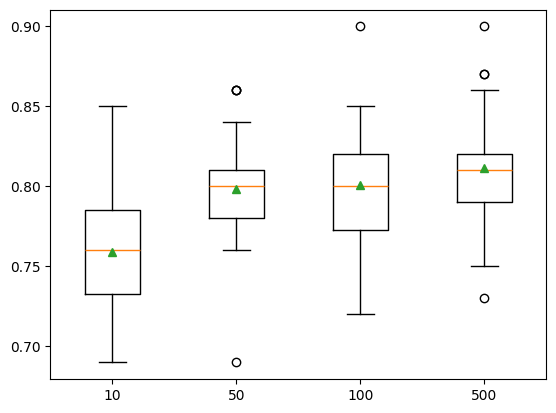

In [ ]:
#Gaficando el resultado de cada iteracion del modelo
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section32"></a> 
## <font color="#004D7F"> 3.2. Profundida del árbol</font>

- Podemos hacer que los modelos utilizados en el conjunto sean menos débiles (más hábiles) aumentando la profundidad del árbol de decisión.
- Utilizar el argumento de `max depth` de `DecisionTreeClassifier`.
- El valor predeterminado es 1, aunque exploraremos valores del 1 al 10. 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
</div>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Se crea funcion donde iteramos el modelo con diferentes profundidad del arbol
def get_models():
	models = dict() #Se almacen los valores en un dic 
	# explorar profundidad de 1 a 10
	for i in range(1,11):
		base = DecisionTreeClassifier(max_depth=i)
		models[str(i)] = AdaBoostClassifier(algorithm="SAMME", estimator=base )
	return models

In [ ]:
X, y = get_dataset()
#Se ejecutan las diferentes funciones creada para evaluar los diferentes parametros
models = get_models()
# evaluar los modelos
results, names = list(), list()
for name, model in models.items():
    # evaluar el modelo
	scores = evaluate_model(model, X, y)
	#Se almacena el resultado
	results.append(scores)
	names.append(name)
	#Se muestra el resultado de cada iteracion
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.798 (0.034)
>2 0.853 (0.033)
>3 0.894 (0.035)
>4 0.910 (0.024)
>5 0.919 (0.028)
>6 0.933 (0.020)
>7 0.937 (0.025)
>8 0.930 (0.028)
>9 0.929 (0.026)
>10 0.932 (0.024)


/var/folders/sg/94bycxyj1gjbd5km5gk6zwb00000gn/T/ipykernel_24201/4003481017.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=names, showmeans=True)


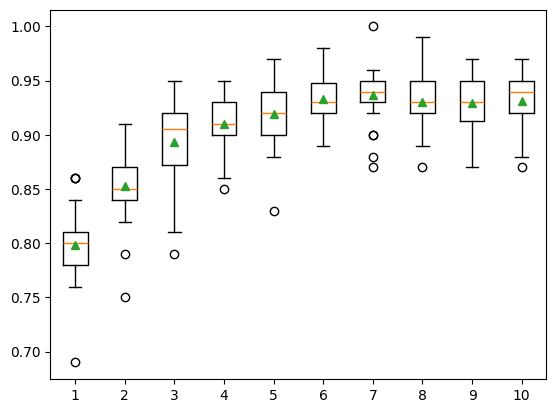

In [ ]:
#Se grafica el resultado de las iteraciones
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section33"></a> 
## <font color="#004D7F"> 3.3. Tasa de aprendizaje</font>

- AdaBoost también admite una tasa de aprendizaje (a veces llamada _shrinkage_) que controla la contribución de cada modelo a la predicción del conjunto.
- Está controlado por el argumento `learning_rate` (por defecto 1,0 o contribución completa).
- Más árboles pueden requerir una tasa de aprendizaje menor; menos árboles pueden requerir una mayor tasa de aprendizaje.
- Es común utilizar valores entre 0 y 1 y, a veces, valores muy pequeños para evitar el sobreajuste, como 0,1, 0,01 o 0,001.

In [53]:
from numpy import arange
#Se crea funcion para iterar el hiperparametro a evaluar
def get_models():
	models = dict()
	# tasa de aprendizaje de 0.1 a 2 con incrementos de 0.1
	for i in arange(0.1,2.1,0.1):
		key = '%.1f' % i #Para que i quede con 1 decimal
		#Se crea el modelo
		models[key] = AdaBoostClassifier(algorithm='SAMME', learning_rate=i)
	return models

In [54]:
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>0.1 0.753 (0.051)
>0.2 0.763 (0.047)
>0.3 0.779 (0.044)
>0.4 0.781 (0.042)
>0.5 0.789 (0.042)
>0.6 0.790 (0.041)
>0.7 0.790 (0.040)
>0.8 0.795 (0.047)
>0.9 0.800 (0.038)
>1.0 0.798 (0.034)
>1.1 0.793 (0.039)
>1.2 0.792 (0.033)
>1.3 0.788 (0.035)
>1.4 0.791 (0.035)
>1.5 0.789 (0.032)
>1.6 0.786 (0.040)
>1.7 0.777 (0.045)
>1.8 0.764 (0.032)
>1.9 0.757 (0.040)
>2.0 0.674 (0.039)


/var/folders/sg/94bycxyj1gjbd5km5gk6zwb00000gn/T/ipykernel_24201/3051874353.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=names, showmeans=True)


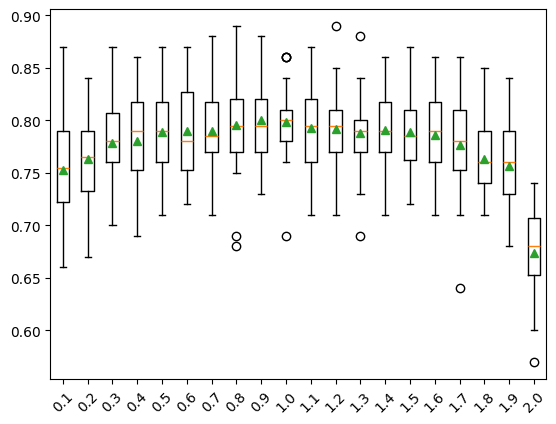

In [55]:
#Se grafica el resultado de las diferentes iteraciones
pyplot.boxplot(results, labels=names, showmeans=True)
#Pone las etiquetas del eje X en una rotacion de 45 grados
pyplot.xticks(rotation=45) 
pyplot.show()


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section34"></a> 
## <font color="#004D7F"> 3.4. Algoritmo alternativo</font>

- Scikit-learn requiere que cualquier modelo utilizado también admita muestras ponderadas, ya que así es como se crea el conjunto ajustando modelos basados en una versión ponderada del conjunto de datos de entrenamiento.
- El modelo base se puede especificar mediante el argumento `estimator`.
- El modelo base también debe soportar la predicción de probabilidades o puntuaciones similares a las de probabilidad en el caso de la clasificación.
- Si el modelo especificado no admite un conjunto de datos de entrenamiento ponderado, verá el siguiente mensaje de error:
```text
    ValueError: KNeighborsClassifier doesn't support sample_weight.
```
Veamos un jemeplo con un clasificador débil `LogisticRegression`.

In [56]:
from sklearn.linear_model import LogisticRegression
X, y = get_dataset()
# definir el modelo
model = AdaBoostClassifier(algorithm="SAMME", estimator=LogisticRegression())

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.788 (0.038)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section4"></a> 
# <font color="#004D7F"> 4. Búsqueda de hiperparámetros</font>

- AdaBoost puede resultar difícil de configurar, ya que el algoritmo tiene muchos hiperparámetros clave que influyen directamente en el rendimiento del modelo
- Usaremos `GridSearchCV` para hacer una búsqueda controladsa de hiperparámentros.
- Buscaremos dos hiperparámetros clave para AdaBoost: la cantidad de árboles utilizados en el conjunto y la tasa de aprendizaje. 
- Cada combinación de configuración se evaluará mediante validación cruzada repetida de _k_ veces y las configuraciones se compararán utilizando accuracy medio.


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
</div>

In [ ]:
X, y = get_dataset()
from sklearn.model_selection import GridSearchCV
# definir AdaBoost con hiperparámetros por defecto
model = AdaBoostClassifier(algorithm="SAMME")

#definir valores para n_stimators y learning_rate en un dic
grid = dict()
grid['n_estimators'] = [10,50,100,500,600]
grid['learning_rate'] = [0.0001,0.001,0.01, 1.0]

#Se configura Kfold para realzar validacion cruzada 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# definir el procedimiento de búsqueda y ejecutarlo en el dataset
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring="accuracy")
grid_result = grid_search.fit(X,y)

print("Mejor combinación: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor combinación: 0.814667 usando {'learning_rate': 1.0, 'n_estimators': 600}


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) con: %r" % (mean, stdev, param))

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="sectionEj"></a>
<h3><font color="#004D7F" size=6> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicios</font></h3>

Se proponen las siguientes actividades para consolidar el aprendizaje.

In [60]:
import os
import pandas as pd

In [69]:
ruta = os.getcwd()
df_price = pd.read_csv(ruta+"/pricerunner_aggregate.csv")
df_sonar =pd.read_csv(ruta+"/sonar.all-data.csv")

In [70]:
df_sonar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [71]:
df_sonar

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [68]:
df_price[" Category Label"].value_counts()

 Category Label
Fridge Freezers     5501
Mobile Phones       4081
Washing Machines    4044
CPUs                3862
Fridges             3584
TVs                 3564
Dishwashers         3424
Digital Cameras     2697
Microwaves          2342
Freezers            2212
Name: count, dtype: int64

# <font color="#004D7F" size=5>Ejercicio 1</font>
__Hiperparámetros__. Explore diferentes configuraciones de hiperparámetros que veas en la librería sobre AdaBoost y comente los resultados. 

# <font color="#004D7F" size=5>Ejercicio 2</font>
__Problema de Regresión__. AdaBoost se puede utilizar con árboles de regresión. En lugar de predecir el valor de clase más común del conjunto de predicciones. Experimente con problemas de regresión.

# <font color="#004D7F" size=5>Ejercicio 3</font>
__Datasets reales__. Busque un dataset original y verdadero (que no sea sintético) y evalúe el uso de los conceptos vistos en esta unidad. Los conjuntos de datos en pueden ser obtenidos del [repositorio de aprendizaje automático de UCI](https://archive.ics.uci.edu/).

# <font color="#004D7F" size=5>Ejercicio 4</font>
__Clasificadores débiles__. Escoja dos clasificadores débiles y desarrolle con GridSearch el impacto de utilizar los hiperparámetros propios de estos. Se puede basar en la Sección 4 pero usando algoritmos diferentes a CART.

# <font color="#004D7F" size=5>Ejercicio 5</font>
__Búsqueda de la mejor configuración__. Como se ha visto existen diferentes hiperparámetros que pueden ajustar nuestro modelo. Haga una búsqueda para un dataset real de cuales, entre un rango amplio de hiperparétros, maximizan la métrica. Puede utilizar una búsqueda aleatoria.

---

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>